In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset_train = pd.read_csv('C:/Users/admin/Desktop/RELIANCE.NS.csv')
dataset_train.shape


(4809, 7)

In [7]:

dataset_train.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,37.095798,39.313702,37.095798,39.313702,16.347446,28531559
1,04-01-2000,40.360199,42.460999,39.251301,42.460999,17.656155,60744659
2,05-01-2000,40.086899,44.967899,40.086899,44.124500,18.347876,171798476
3,06-01-2000,45.139702,46.967201,45.139702,45.975300,19.117474,100403390
4,07-01-2000,46.076900,49.653702,45.764500,49.130402,20.429432,127220830


In [8]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[  37.095798],
       [  40.360199],
       [  40.086899],
       ...,
       [1231.5     ],
       [1216.900024],
       [1213.949951]])

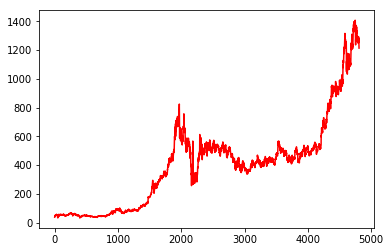

In [9]:
plt.plot(training_set, color = 'red', label = 'reliance stock')

In [10]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.0036328 ],
       [0.00600544],
       [0.0058068 ],
       ...,
       [0.87175226],
       [0.86114068],
       [0.8589965 ]])

In [11]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
y_train

array([0.00720884, 0.01038753, 0.01386704, ..., 0.03996061, 0.03876862,
       0.03913189])

In [12]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [13]:
#Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [14]:
# Initialising the RNN
regressor = Sequential()

In [15]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [19]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [20]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
X_train.shape

(1198, 60, 1)

In [22]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 16s 13ms/step - loss: 1.0135e-04
Epoch 2/100
1198/1198 [==============================] - 9s 8ms/step - loss: 2.0891e-05
Epoch 3/100
1198/1198 [==============================] - 9s 7ms/step - loss: 1.7585e-05
Epoch 4/100
1198/1198 [==============================] - 9s 8ms/step - loss: 1.3377e-05
Epoch 5/100
1198/1198 [==============================] - 9s 7ms/step - loss: 1.3993e-05
Epoch 6/100
1198/1198 [==============================] - 9s 8ms/step - loss: 1.4396e-05
Epoch 7/100
1198/1198 [==============================] - 9s 8ms/step - loss: 1.4172e-05
Epoch 8/100
1198/1198 [==============================] - 9s 7ms/step - loss: 1.0778e-05
Epoch 9/100
1198/1198 [==============================] - 9s 8ms/step - loss: 1.2804e-05
Epoch 10/100
1198/1198 [==============================] - 9s 7ms/step - loss: 1.3893e-05
Epoch 11/100
1198/1198 [==============================] - 9s 8ms/step

1198/1198 [==============================] - 9s 8ms/step - loss: 5.3097e-06
Epoch 91/100
1198/1198 [==============================] - 9s 7ms/step - loss: 5.6236e-06
Epoch 92/100
1198/1198 [==============================] - 9s 8ms/step - loss: 6.0249e-06
Epoch 93/100
1198/1198 [==============================] - 10s 8ms/step - loss: 5.0858e-06
Epoch 94/100
1198/1198 [==============================] - 9s 7ms/step - loss: 5.7695e-06
Epoch 95/100
1198/1198 [==============================] - 9s 7ms/step - loss: 4.9502e-06
Epoch 96/100
1198/1198 [==============================] - 9s 7ms/step - loss: 5.7153e-06
Epoch 97/100
1198/1198 [==============================] - 9s 8ms/step - loss: 5.7347e-06
Epoch 98/100
1198/1198 [==============================] - 9s 7ms/step - loss: 6.2789e-06
Epoch 99/100
1198/1198 [==============================] - 9s 8ms/step - loss: 5.5744e-06
Epoch 100/100
1198/1198 [==============================] - 9s 8ms/step - loss: 5.5147e-06


In [23]:
# Making the predictions and visualising the results
# Getting the real stock price of 2017
dataset_test = pd.read_excel('C:/Users/admin/Desktop/reliance test.xlsx')
real_stock_price = dataset_test.iloc[:, 1:2].values

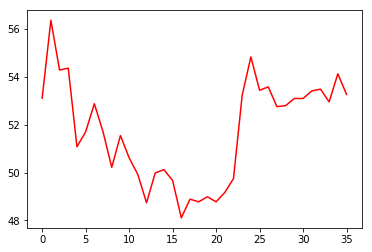

In [24]:
plt.plot(real_stock_price, color = 'red', label = 'Reliance Stock Price')

In [34]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

IndexError: tuple index out of range

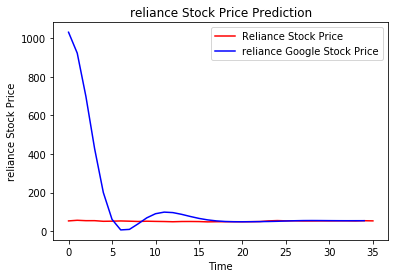

In [35]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Reliance Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'reliance Google Stock Price')
plt.title('reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('reliance Stock Price')
plt.legend()
plt.show()